## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
prop_converted = (df['converted'] == 1).mean()
prop_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [8]:
n = df.query('group == "treatment" & landing_page != "new_page"').count()[0]
m = df.query('group == "control" & landing_page != "old_page"').count()[0]
n+m

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
df.isnull().values.any()

False

In [11]:
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [40]:
df_1 = df[(df.group == "treatment") & (df.landing_page == "new_page")]
df_2 = df[(df.group == "control") & (df.landing_page == "old_page")]
frames = [df_1, df_2]              
#df2 df = df.drop(df[df.score < 50].index)
df_1.shape[0] + df_2.shape[0]
df2 = pd.concat(frames)
df2.shape[0]

290585

In [41]:
df.shape[0] - (m+n) == (df_1.shape[0] + df_2.shape[0])

True

In [42]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [43]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [44]:
dup  = df2[df2['user_id'].duplicated() == True]
dup

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [45]:
## See above

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [46]:
df2 = df2.drop_duplicates(['user_id'], keep='last')

In [47]:
df2['user_id'].nunique()
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [48]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


In [49]:
(df2['converted'] == 1).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [50]:
control_mean = (df2.query('group == "control"')['converted']==1).mean()
control_mean

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [51]:
treatment_mean = (df2.query('group == "treatment"')['converted']==1).mean()
treatment_mean

0.11880806551510564

In [111]:
# the observed difference
obs_diff = treatment_mean - control_mean
obs_diff

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [53]:
(df2['landing_page']== 'new_page').mean()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

** There was a 12.04% conversion rate for the control group and a 11.88% conversion rate for the treatment group.  The data suggests that there is a difference in the conversion rates.  It would be beneficial to run a hypothesis test to check if the slight difference is statistically significant.   **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} = p_{old} $$ 
$$H_1: p_{new} < \ p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [54]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


In [55]:
p_new = (df2['converted']==1).mean()
p_new

0.11959708724499628

In [56]:
#find the standard deviation of p_new
p_new_std = (df2['converted']==1).std()
p_new_std

0.32449034857837683

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [57]:
p_old = (df2['converted']==1).mean()
p_old

0.11959708724499628

In [58]:
#find the standard deviation of p_old
p_old_std = (df2['converted']==1).std()

c. What is $n_{new}$?

In [59]:
n_new = (df2[df2['landing_page']=='new_page']).count()[0]
n_new

145310

d. What is $n_{old}$?

In [60]:
n_old = (df2[df2['landing_page']=='old_page']).count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [95]:
#Simulate distribution under the null hypothesis
'''
new_page_converted = np.random.normal(p_new, p_new_std, n_new )
'''
new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [97]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old, 1-p_old])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [98]:
new_page_converted.mean() - old_page_converted.mean()

0.0048749296968723099

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [56]:
df2.head()
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [100]:
(df2.query('group == "control"')['converted']==1).mean()

0.1203863045004612

In [105]:
# create a sampling distribution of difference of proportion
# values of the New and Old landing pages (with bootstrapping)
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[p_new, 1-p_new]).mean()
    old_page_converted = np.random.choice([0,1], size=n_old, p=[p_old, 1-p_old]).mean()
    
    p_diffs.append(old_page_converted - new_page_converted)
 
    
    '''
    boot_samp_new = df2.sample(n_new, replace=True)
    boot_samp_old = df2.sample(n_old, replace=True)
    p_new = (boot_samp_new.query('group == "treatment"')['converted']==1).mean()
    p_old = (boot_samp_old.query('group == "control"')['converted']).mean()
    p_diffs.append(p_new-p_old)
    '''
    

In [106]:
# convert to p_diffs into a numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

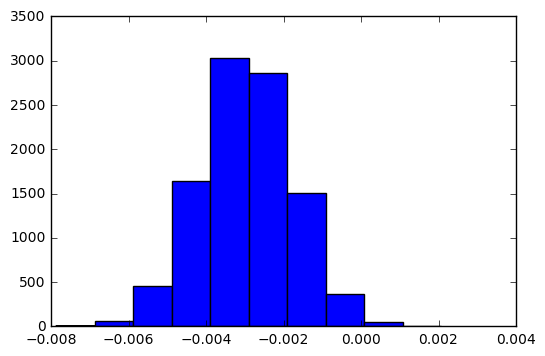

In [107]:
# plot the sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [108]:
null_values = np.random.normal(0, p_diffs.std(), 10000)

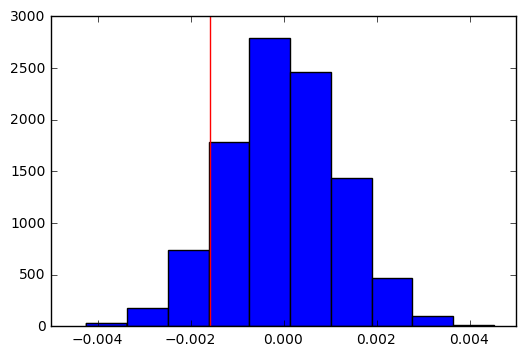

In [109]:
#plot the distribution under the null
plt.hist(null_values)

#plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [110]:
# The p-value for a two-sided hypothesis test
((null_values<obs_diff).mean())

0.099400000000000002

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j., the P-value of a two-tailed test was computed. The P-value represents the probability that there is a difference in p_new and p_old, assuming that the p_new and p_old are equal.  Since the P-value = 0.099, and at a significance level of 0.05, we fail to recject the null hypothesis. Thus, there is insufficient evidence to support  the claim that there is a difference in p_new and p_old. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0


In [80]:
import numpy as np

# count the convertion rates for the control and treatment group
convert_old = df2.query('group == "control" & converted==1').count()[0]
convert_new = df2.query('group == "treatment" & converted ==1').count()[0]

# count the total observations in the control and treatment group 
n_old = df2[df2['group'] == "control"].count()[0]
n_new = (df2[df2['landing_page']=='new_page']).count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [90]:
import statsmodels.api as sm
import statsmodels.stats.proportion as smProp

# find the z-score and the p-value of a two-sided hypothesis test
counts = np.array((convert_new,convert_old))
nobs = np.array((n_new, n_old))
results = smProp.proportions_ztest(counts, nobs, value= 0, alternative='smaller')

print (results)

(-1.3109241984234394, 0.094941687240975514)


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score of 1.31 translates to a P-value of 0.095.  The P-value of 0.095 indicates that we fail to reject the null hypothesis.   That is, there is insufficient evidence to support the claim that p_new is less than p_old.  In part, j. and k. a P-value of 0.099 was computed, which is very close to the p-value obtained by using a z-score.  Both methods are similar to each other and generate similar results. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

** Logistic regression must be used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [28]:
# create an intercept column and fill it in with ones.
df2['intercept'] = 1

In [29]:
# create a function that assigns a 1 for the treatment group and a 0 for the control group.
def ab_page_assign(row):
    ''' (pandas.series)-> int 
    Return the 1 for treatment and 0 for control
    
    >>> ab_page_assign('treatment')
    1
    '''
    if row['group'] == 'treatment':
        val = 1
    elif row['group'] == 'control':
        val = 0
    
    return val

# assign the values of 1 or 0 to the 'ab_page' column
df2['ab_page'] = df2.apply(ab_page_assign, axis=1)


In [30]:
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
# create a list of lists for the x values that will be used for the OLS function.
x_values = df2.reset_index()[['intercept', 'ab_page']].values.tolist()
X = df2[['intercept', 'ab_page']] 

In [32]:
# perform logistic regression
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        08:43:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000        -2.005    -1.973
ab_page       -0.0150      0.011     -1.311      0.190        -0.037     0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

** The P-value of the ab_page coefficient is 0.19. **

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P-value for the ab_page is 0.19. The ab_page data is not statistically significant for predicting conversion.**



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

** Considering how various factors infuluence conversion rates makes the regression model much more robust. Considering and testing variables such as time of day, country, income could shed some light as to what has an impact on conversion rates. **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [34]:
# check to see if the countries dataframe has the same amount of rows as the df2 dataframe
countries.shape[0] == df2.shape[0]

True

In [35]:
# get a count of how many countries are in the country column
countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [36]:
# join two dataframes: df2 and countries
df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [37]:
# create a function that assigns a 1 for US, 2 for UK and 3 for CA.
def country_assign(row):
    if row['country'] == 'US':
        val = 1
    elif row['country'] == 'UK':
        val = 2
    else:
        val = 3
    
    return val

# assign the values of 1 or 0 to the 'ab_page' column
df3['country_code'] = df3.apply(country_assign, axis=1)

In [38]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,country_code
user_id,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,3
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,2
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,3


In [39]:
# create a column for all of the country codes 
# c1 is US, c2 is UK, and c3 is CA
df3[['c1', 'c2','c3']] = pd.get_dummies(df3['country_code'])

In [40]:
# check the df3 with the new columns added
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,country_code,c1,c2,c3
user_id,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,1.0,0.0,0.0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,1.0,0.0,0.0
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,3,0.0,0.0,1.0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,2,0.0,1.0,0.0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,3,0.0,0.0,1.0


In [43]:
# perform logistic regression
logit_mod = sm.Logit(df3['converted'], df3[['intercept','c2','c3']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        09:50:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000        -2.010    -1.983
c2             0.0099      0.013      0.746      0.456        -0.016     0.036
c3            -0.0408      0.027     -1.518      0.129        -0.093     0.012
==============================================================================
"""

**Does it appear that country had an impact on conversion?
The P-value for the c2 which represents UK is 0.456 and for c3 is 0.129 which represents CA. 
The country data is not statistically significant for predicting conversion. **

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# create a list that contain independent variables
X = df3[["ab_page", "c2", "c3"]]

# perform OLS
# perform logistic regression
df3['intercept'] = 1
logit_mod = sm.Logit(df3['converted'], X)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.492231
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Dec 2017   Pseudo R-squ.:                 -0.3444
Time:                        10:19:03   Log-Likelihood:            -1.4303e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ab_page       -1.7227      0.008   -207.404      0.000        -1.739    -1.706
c2            -1.3968      0.012   -117.688      0.000        -1.420    -1.373
c3            -1.4422      0.027    -53.796      0.000        -1.495    -1.390
==============================================================================
"""

In [45]:
# exponentiate the ab_page, UK(c2), CA(c3)
np.exp(-1.7227), np.exp(-1.3968), np.exp(-1.4422)


(0.17858332142121114, 0.24738733815050129, 0.23640709055796047)

In [46]:
# reciprocals of the coeffiecients
1/np.exp(-1.7227), 1/np.exp(-1.3968), 1/np.exp(-1.4422)


(5.5996270650682698, 4.0422440674455098, 4.2299915693722721)

** Analyzing the ab_page and country data together, the results show that both p-values are 0.  This indicates that both ab_page and country are statistically significant in predicting conversion rates. 
Interpretation:  If an individual is from the US, the individual is 4.04 times more likely to convert than if they were from the UK.
If an individual is from the US, the individual is 4.22 times more likely to convert than if they were from CA. The ab_page data is statistically significant for predicting conversion.
**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.